# Statistics and Inverse Problems 2025
##  Exercise 1 - Probability distributions

### Author(s), contact(s), and dates:
- Author: Valentina Espinoza Fernández (University of Copenhagen)
- Email:  vf@ign.ku.dk
- Date:   9th of January 2025

# Tabel of contents
* [Common distributions](#common-distributions)
* [Generate Gaussian distributions](#generate_gaussian)
* [Fit Gaussian distributions](#fit_gaussian)
* [Goodness of fit](#goodness_of_fit)

In this notebook, we will explore and familiarize ourselves with the key parameters that define the most common probability distributions in statistics, focusing on Gaussian distributions. With Python, you will learn how to generate your own Gaussian sample, go back and fit this data to a Gaussian distribution, and learn to evaluate the goodness of said fit.

In [66]:
# Public dependencies
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

## Common distributions  <a  class="anchor" id="common-distributions"></a>

Here we will visualize the shape of the most common distributions, that is, the Uniform, Exponential and Gaussian distribution. A formal construction of a Guassian sample is show in the next section. 
1. Can you infer how the parameters within each function (e.g., `loc`, `scale`) affect the shape of the distribution? 
2. For the Gaussian distribution, do yo know the formal names for these parameters? 

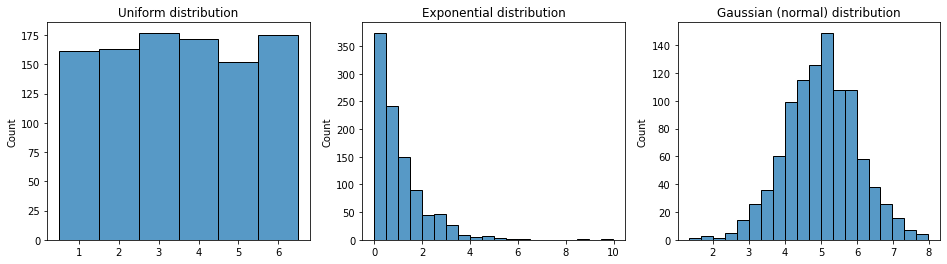

In [67]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 4))

# Uniform distribution
array_uniform = np.random.uniform(low=0.5, high=6.5, size=1000)
sns.histplot(array_uniform, bins=6, ax=ax1)
ax1.set(title="Uniform distribution")

# Exponential distribution
array_exp = np.random.exponential(scale=1.0, size=1000)
sns.histplot(array_exp, bins=20, ax=ax2)
ax2.set(title="Exponential distribution");

# Gaussian (normal) distribution
array_gaussian = np.random.normal(loc=5.0, scale=1.0, size=1000)
sns.histplot(array_gaussian, bins=20, ax=ax3)
ax3.set(title="Gaussian (normal) distribution");

Notice the `size` parameter, it determines the size of the sample. Can you realistically measure something 1000 times? 

3. Experiment with the parameters `size` and `bins` to see their impact on the shape. 

## Generate Gaussian distributions  <a class="anchor" id="generate_gaussian"></a>

#### Set parameters

In [68]:
n_samples = 1000        # Number of samples
mu0 = 5.0               # Mean (original)
std0 = 1.0              # Standard deviation (original)

#### Create array of values

In [69]:
array_normal = np.random.normal(mu0, std0, n_samples)       # Use numpy to generate n_samples values following a Gaussian distribution

#### Visualize histogram

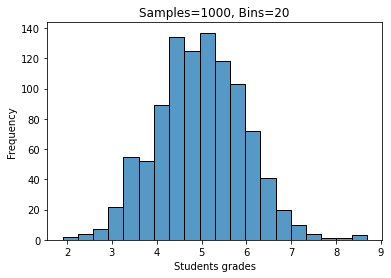

In [70]:
n_bins = 20         # Number of bins for the histogram


# Plot the histogram (using the seaborn package) 
ax = sns.histplot(array_normal, bins=n_bins)             

# Embellish your plot with labels and a title
ax.set(xlabel='Students grades',                   
       ylabel='Frequency', 
       title='Samples=%d, Bins=%d' % (n_samples, n_bins)
);

You may add the parameter `kde=True` to the `sns.histplot` function to plot a curve that follows the histogram distribution. To simply plot the curve try the command `ax = sns.kdeplot(array_normal)` instead.

## Fit Gaussian distributions <a class="anchor" id="fit_gaussian"></a>

A Gaussian curve can be parametrized into a mean and standard deviation. Lets pretend we forgot the the parameters that constructed the above array (`mu0, std0`). We do know they resemble a Gaussian curve (we *know* they do come from one), so we will fit the data to a normal distribution and by that estimate its mean and standard deviation (`mu, std`).

In [71]:
# Define the function for Gaussian curves
def gaussian(x, mean, std_dev):            
    return stats.norm.pdf(x, mean, std_dev)  # We could write the formal equation or use scipy's pre-written function

# Extract the x-coordinates of the array
xmin, xmax = np.min(array_normal), np.max(array_normal)
x = np.linspace(xmin, xmax, 100)

# Fit a Gaussian distribution with scipy
mu, std = stats.norm.fit(array_normal)    # Estimate the mean(mu) and standard deviation (std) from a given array of values

# Calculate the y-values for the x-array based on a Gaussian curve with the fitted mu and std values
pdf = gaussian(x, mu, std) 

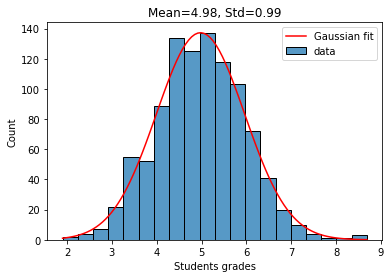

In [72]:
# Plot the original data
ax = sns.histplot(array_normal, bins=n_bins, label="data")
bin_width = [patch.get_width() for patch in ax.patches][0]        # Extract binwidth from plot

# Plot the fitted Gaussian curve (scale to y-values to histogram)
pdf_scaled = pdf * len(array_normal) * bin_width
ax.plot(x, pdf_scaled, color='red', label='Gaussian fit')  
  

# Polish plot
ax.legend()
ax.set(xlabel='Students grades', title='Mean=%.2f, Std=%.2f' % (mu, std));

The fit is quite good, as we know the fitted `mu` and `std` closely resemble the original `mu0` and `std0` values. 
4. Do you expect a reasonable fit if `array_normal` was only 100 elements in size? Change the value of `n_samples` to 100 and then 10. 

## Goodness of fit <a class="anchor" id="goodness_of_fit"></a>

Assessing the goodness of fit by comparing `mu` and `mu0` is valid, but we can do better. Lets take avantage of the chisquare methods to compare the fit between the original parameters and the fitted values:

In [73]:
# Sample data
data = np.random.normal(loc=5.0, scale=1.0, size=200)    # We use an sample with 200 elements, a mean of 5.0 and std of 1.0

# Define the bins (chisquare compares binned frequencies!)
n_bins = 20
bin_edges = np.linspace(0, 10, n_bins+1)
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])

# Extract the "observed" frequencies
observed_freq, _ = np.histogram(data, bins=bin_edges, density=True)


# Calculate "expected" frequencies for the fitted normal distribution (let say got mu=5.01 and std=0.96)
mean_exp = 5.1
std_exp = 0.96
expected_freq = stats.norm.pdf(bin_centers, loc=mean_exp, scale=std_exp)

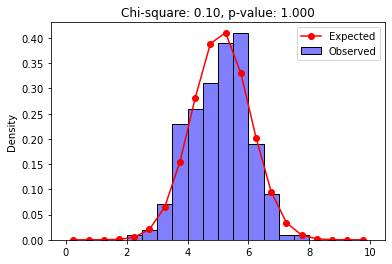

In [74]:
# Perform the chi-square goodness of fit test
chi2_stat, p_value = stats.chisquare(observed_freq, expected_freq, ddof=2)      # ddof is the number of estimated parameters in the fit, mu and std.

# Plot results
ax = sns.histplot(data, bins=bin_edges, label='Observed', color='blue', alpha=0.5, stat='density')  # Plot "observed" frequencies
ax.plot(bin_centers, expected_freq, label='Expected', color='red', marker='o')                      # Plot "expected" frequencies

ax.set(title='Chi-square: %.2f, p-value: %.3f' % (chi2_stat, p_value))
ax.legend();

5. Try changing the `data` array for an array with less samples, e.g., `size = 10`. See how that affects the P-Value and therefore our confidence in the distribution of the data. 6. Try instead to replace the expected Gaussian distribution to one slightly more off (e.g., `mean_exp = 5.2`) and see the fit. 
7. Maybe replace the data distribution for something else entirely, e.g., `data = np.random.uniform(size=100)`. 

Do you trust the P-value to guide your conclusions?